# Bounding ellipsoid notebook

In [1]:
import numpy as np
import test_image_ellipsoid as tie
import plot
import bounding_ellipsoid as be
import bounding_box as bb

## Test with small noise

Creation of an ellipsoidal test image with a = 100, b = 50, c = 30 and a noise amplitude of 10.   
The produced cloud of points is rotated by an angle of pi/7 around the x axis et pi/6 around the y axis

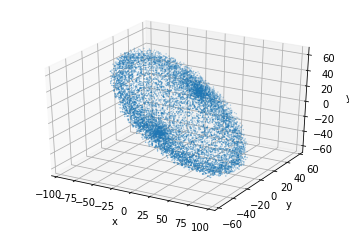

In [2]:
aggregate = tie.ellipsoid_test_image(10000, 100., 50., 30., 10., np.pi/7., np.pi/6.)
fig = plot.scatter_plot(aggregate)

We can find the optimal bounding box

In [3]:
bb.bbox_volume(aggregate)
bb.bbox_optim(aggregate)

bouding box optimization: 
       fun: 124.11319946919764
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([  7639.29183876, 107316.4819374 ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 645
      nit: 18
   status: 0
  success: True
        x: array([ 5.88083961, -2.25908069])


ValueError: setting an array element with a sequence.

In [5]:
be.bounding_ellipsoid_optim(aggregate, 1e-3)

TypeError: bbox_optim() takes 1 positional argument but 2 were given

## Test with big noise

Creation of an ellipsoidal test image with a = 100, b = 50, c = 30 and a noise amplitude of 30.   
The produced cloud of points is rotated by an angle of pi/7 around the x axis et pi/6 around the y axis

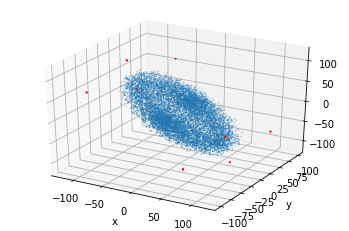

In [4]:
test_image_coord = tie.ellipsoid_test_image(10000, 100., 50., 30., 30., np.pi/7., np.pi/6.)
plot.bbox_plot(test_image_coord, -np.pi/7., -np.pi/6., 2)

bouding box optimiztation: 
       fun: 2585563.6810866254
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([136187.57948279, 245299.19028282])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 126
      nit: 10
   status: 0
  success: True
        x: array([-0.45725723, -0.52092678])


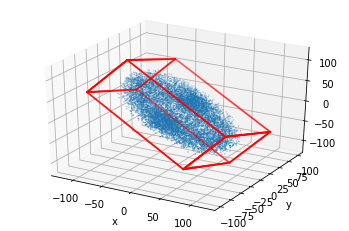

volume = 1989704.5637423443
a =  129.57698941422657 b =  72.03922609329283 c =  50.88655646626317


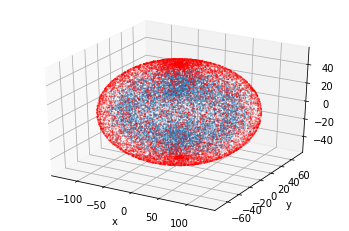

(1989704.5637423443, 129.57698941422657, 72.03922609329283, 50.88655646626317)

In [17]:
be.bounding_ellipsoid_optim(test_image_coord, 1e-3)

## Test with ultra-big noise

Creation of an ellipsoidal test image with a = 100, b = 50, c = 30 and a noise amplitude of 1000.   
The produced cloud of points is rotated by an angle of pi/7 around the x axis et pi/6 around the y axis

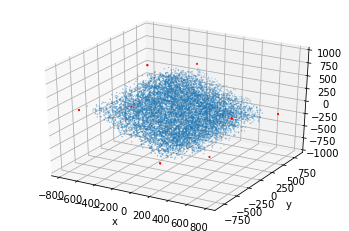

In [18]:
test_image_coord = tie.ellipsoid_test_image(10000, 100., 50., 30., 1000., np.pi/7., np.pi/6.)
plot.bbox_plot(test_image_coord, -np.pi/7., -np.pi/6., 2)

bouding box optimiztation: 
       fun: 1364314077.5174417
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.91469288e+08,  1.01511478e+07])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 276
      nit: 12
   status: 2
  success: False
        x: array([-0.44864622, -0.53407671])


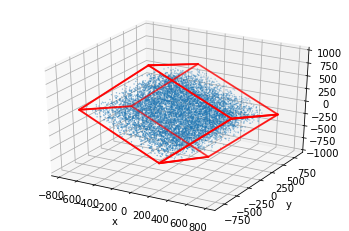

volume = 2850059690.646258
a =  933.0532233711264 b =  866.7106700966499 c =  841.3656663312671


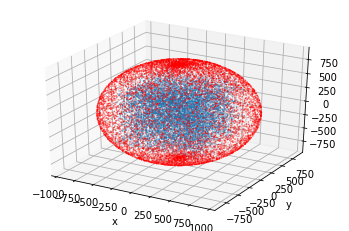

(2850059690.646258, 933.0532233711264, 866.7106700966499, 841.3656663312671)

In [19]:
be.bounding_ellipsoid_optim(test_image_coord, 1e-3)

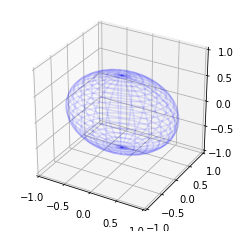

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=plt.figaspect(1))  # Square figure
ax = fig.add_subplot(111, projection='3d')

coefs = (1, 2, 2)  # Coefficients in a0/c x**2 + a1/c y**2 + a2/c z**2 = 1 
# Radii corresponding to the coefficients:
rx, ry, rz = 1/np.sqrt(coefs)

# Set of all spherical angles:
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

# Cartesian coordinates that correspond to the spherical angles:
# (this is the equation of an ellipsoid):
x = rx * np.outer(np.cos(u), np.sin(v))
y = ry * np.outer(np.sin(u), np.sin(v))
z = rz * np.outer(np.ones_like(u), np.cos(v))

# Plot:
ax.plot_wireframe(x, y, z,  rstride=4, cstride=4, color='b', alpha=.1)

# Adjustment of the axes, so that they all have the same span:
max_radius = max(rx, ry, rz)
for axis in 'xyz':
    getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))

plt.show()

## Sphere Test

Creation of a spherical test image with a radius of 100 and a noise amplitude of 10.

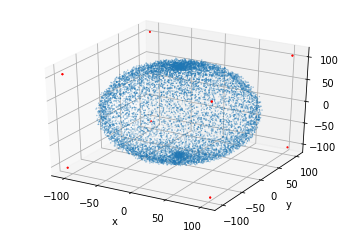

In [21]:
test_image_coord = tie.ellipsoid_test_image(10000, 100., 100., 100., 10., 0., 0.)
plot.bbox_plot(test_image_coord, 0., 0., 2)

bouding box optimiztation: 
       fun: 9121493.988747627
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -56208.85640383, -154077.63421535])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 126
      nit: 14
   status: 0
  success: True
        x: array([ 0.02220306, -0.00857508])


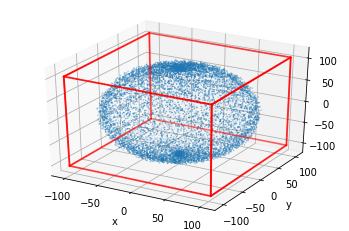

volume = 5263763.611780138
a =  108.13440448226532 b =  107.35374768769434 c =  108.24969097252637


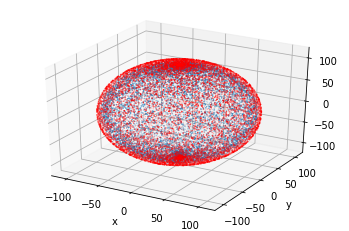

(5263763.611780138, 108.13440448226532, 107.35374768769434, 108.24969097252637)

In [22]:
be.bounding_ellipsoid_optim(test_image_coord, 1e-3)